In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Here we cant get any null value but if we show the statistical summary of our dataset then we realise many column have the minimum value 0 which is not possible like( BloodPressure, Insulin, BMI, etc...) 

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Creating Histogram for all columns 

In [14]:
# create copy 
df_new=df.copy()

# define columns 
col=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']

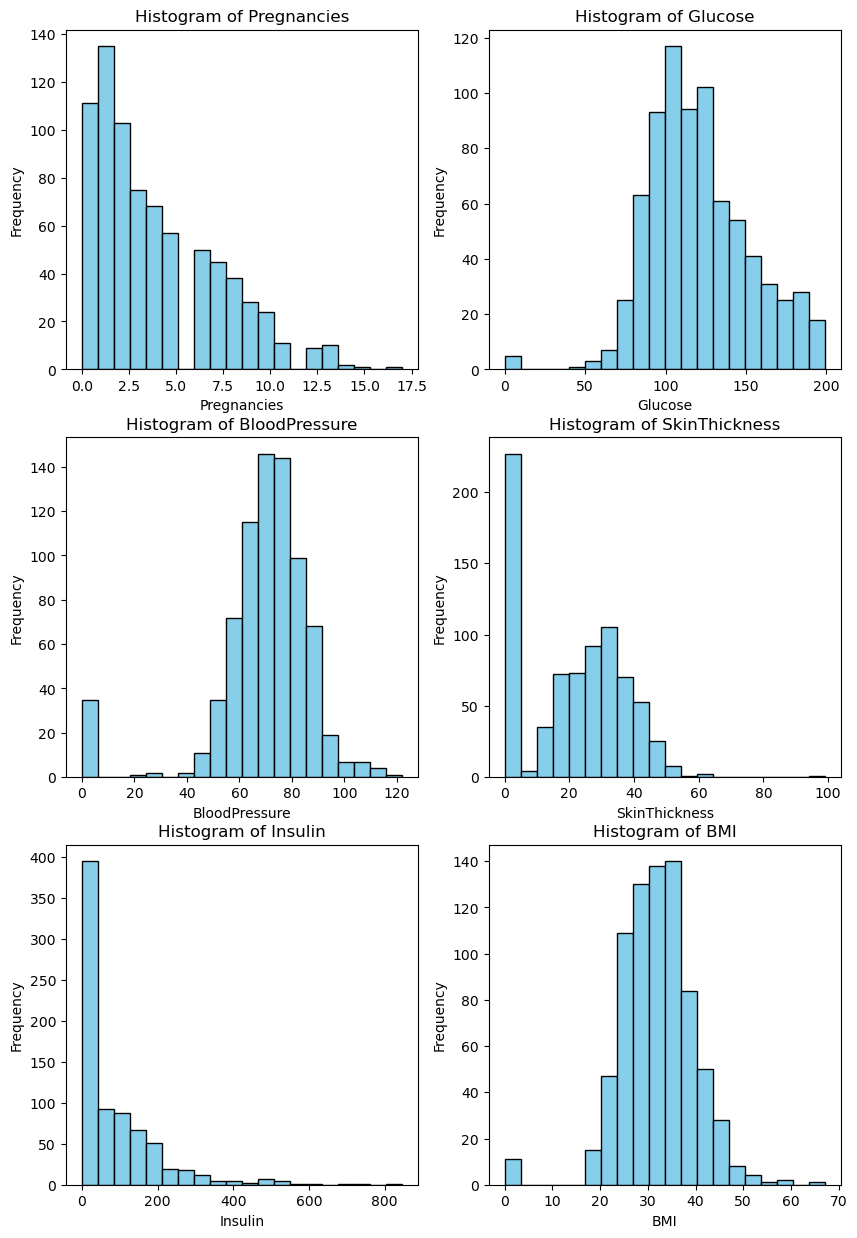

In [16]:
plt.figure(figsize=(10,15))

for i, column in enumerate(col):
    plt.subplot(3,2,i+1)
    plt.hist(df_new[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel("Frequency")


## Observations  :

We Observed that in many column some of the values are 0 which is not possible so we need to remove it.

## 0 value Imputation using median

In [18]:
# need to impute the value where it is 0 :

# replcae 0 value with its median 
for i in col:
    df_new[i]=df_new[i].replace( 0, df_new[i].median() )


Using .median() method we impute the 0 value and now show the result using .describe() method 

In [20]:
df_new.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Visual Representation of every column after Impuatation :

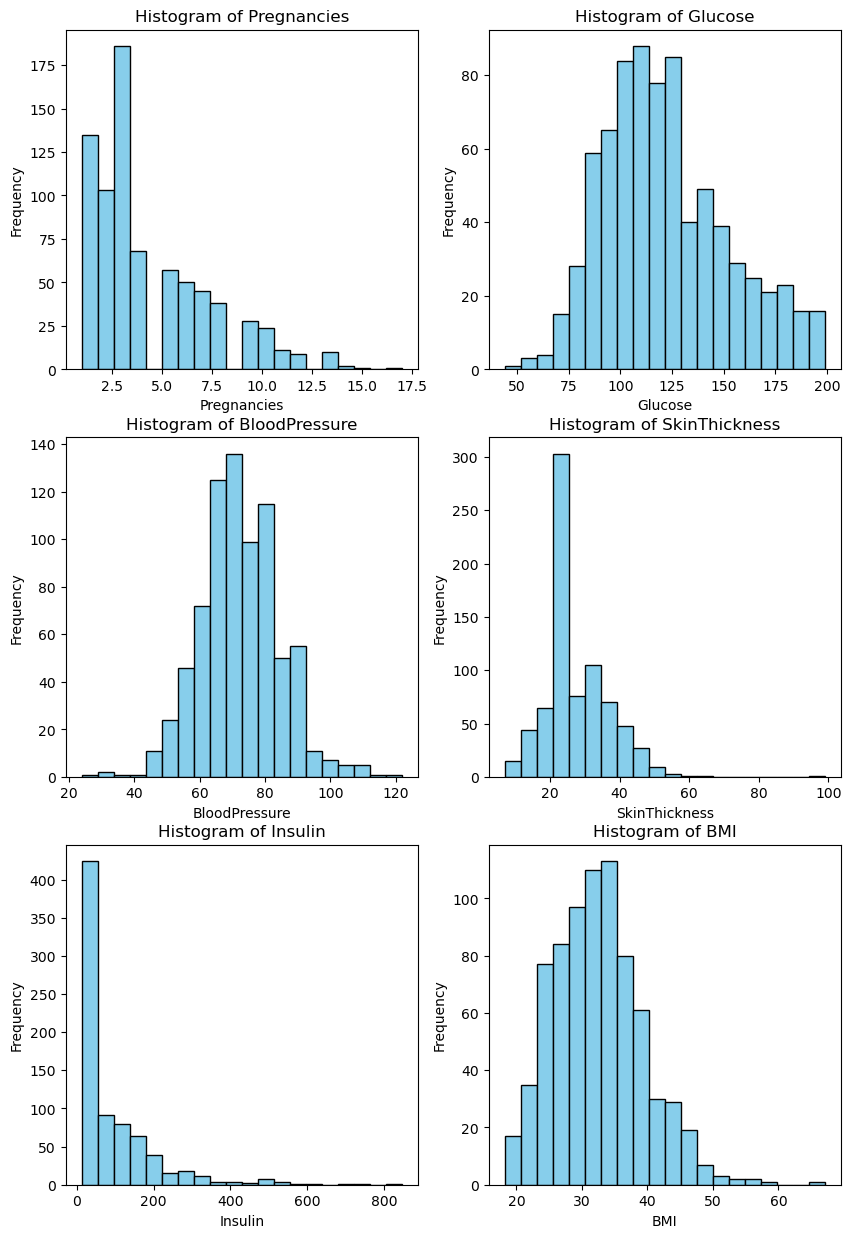

In [22]:
plt.figure(figsize=(10,15))

for i, column in enumerate(col):
    plt.subplot(3,2,i+1)
    plt.hist(df_new[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel("Frequency")

In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


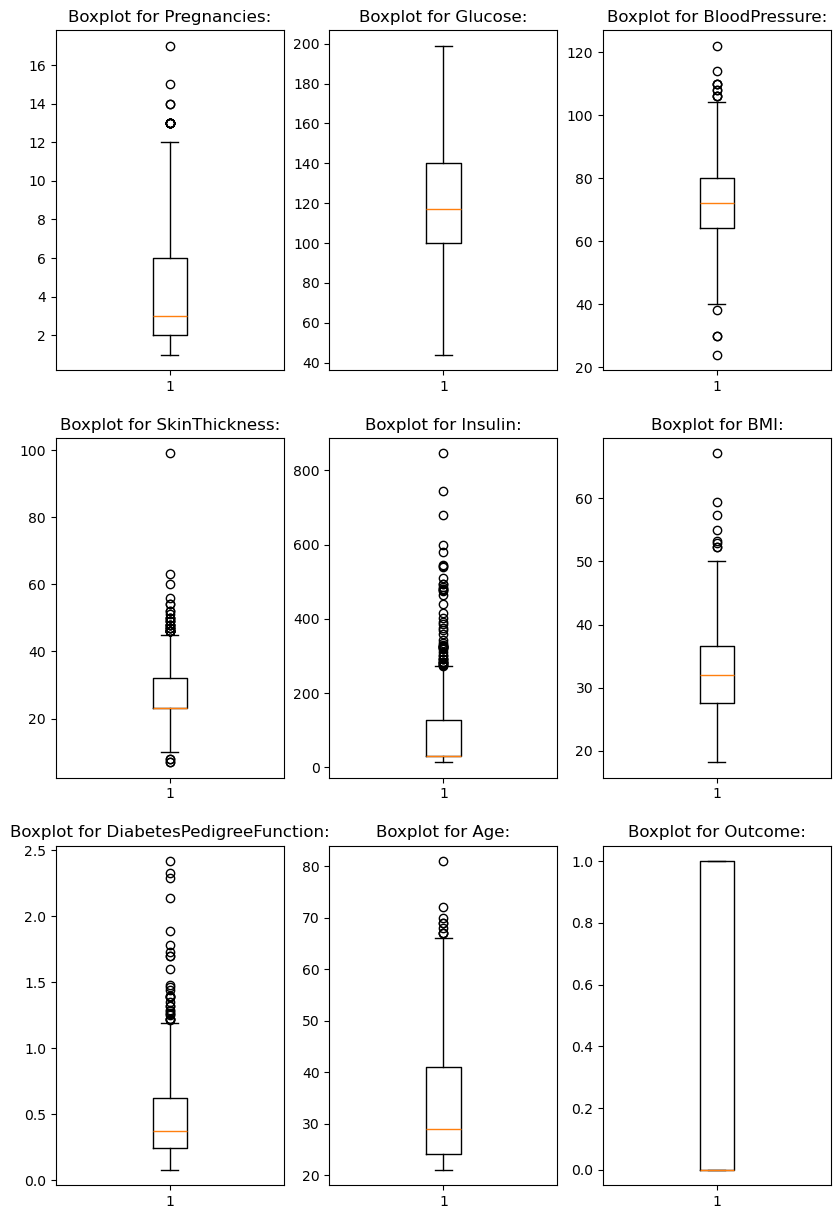

In [36]:
# Now lets check the outlier using boxplot method :

df_numeric =df_new.select_dtypes(include=['number'])

plt.figure(figsize=(10,15))
for i, col in enumerate(df_numeric.columns):
    plt.subplot(3,3,i+1)
    plt.boxplot( data=df_numeric, x=df_numeric[col] )
    plt.title(f'Boxplot for {col}:')

In [30]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


## Boxplot Logic :

# Correlation btw all columns 

In [38]:
df_new.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.149326,0.247530,0.060706,-0.059580,0.080540,-0.016151,0.538169,0.245466
Glucose,0.149326,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.247530,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.060706,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.059580,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.080540,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.016151,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.538169,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.245466,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


<Axes: >

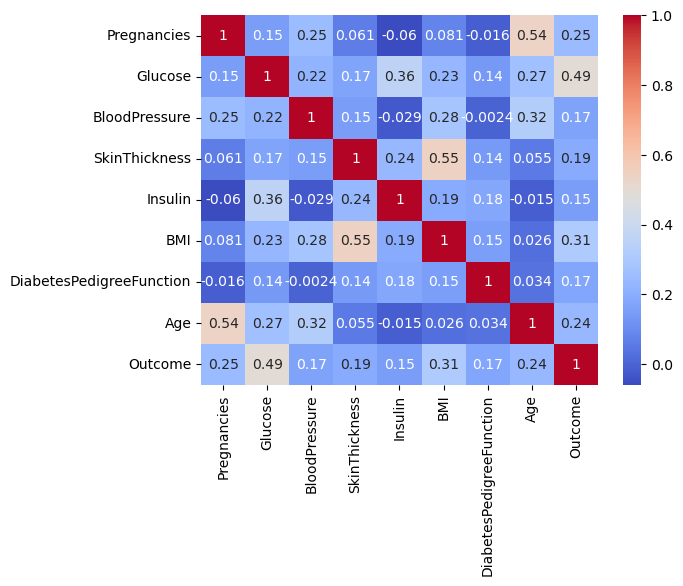

In [40]:
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm')

## Pairplot

--pairplot() creates pairwise scatter plots for all numeric features in the DataFrame, showing relationships between variables and distributions on the diagonal. It's useful for visualizing patterns, clusters, or correlations in multivariate data.



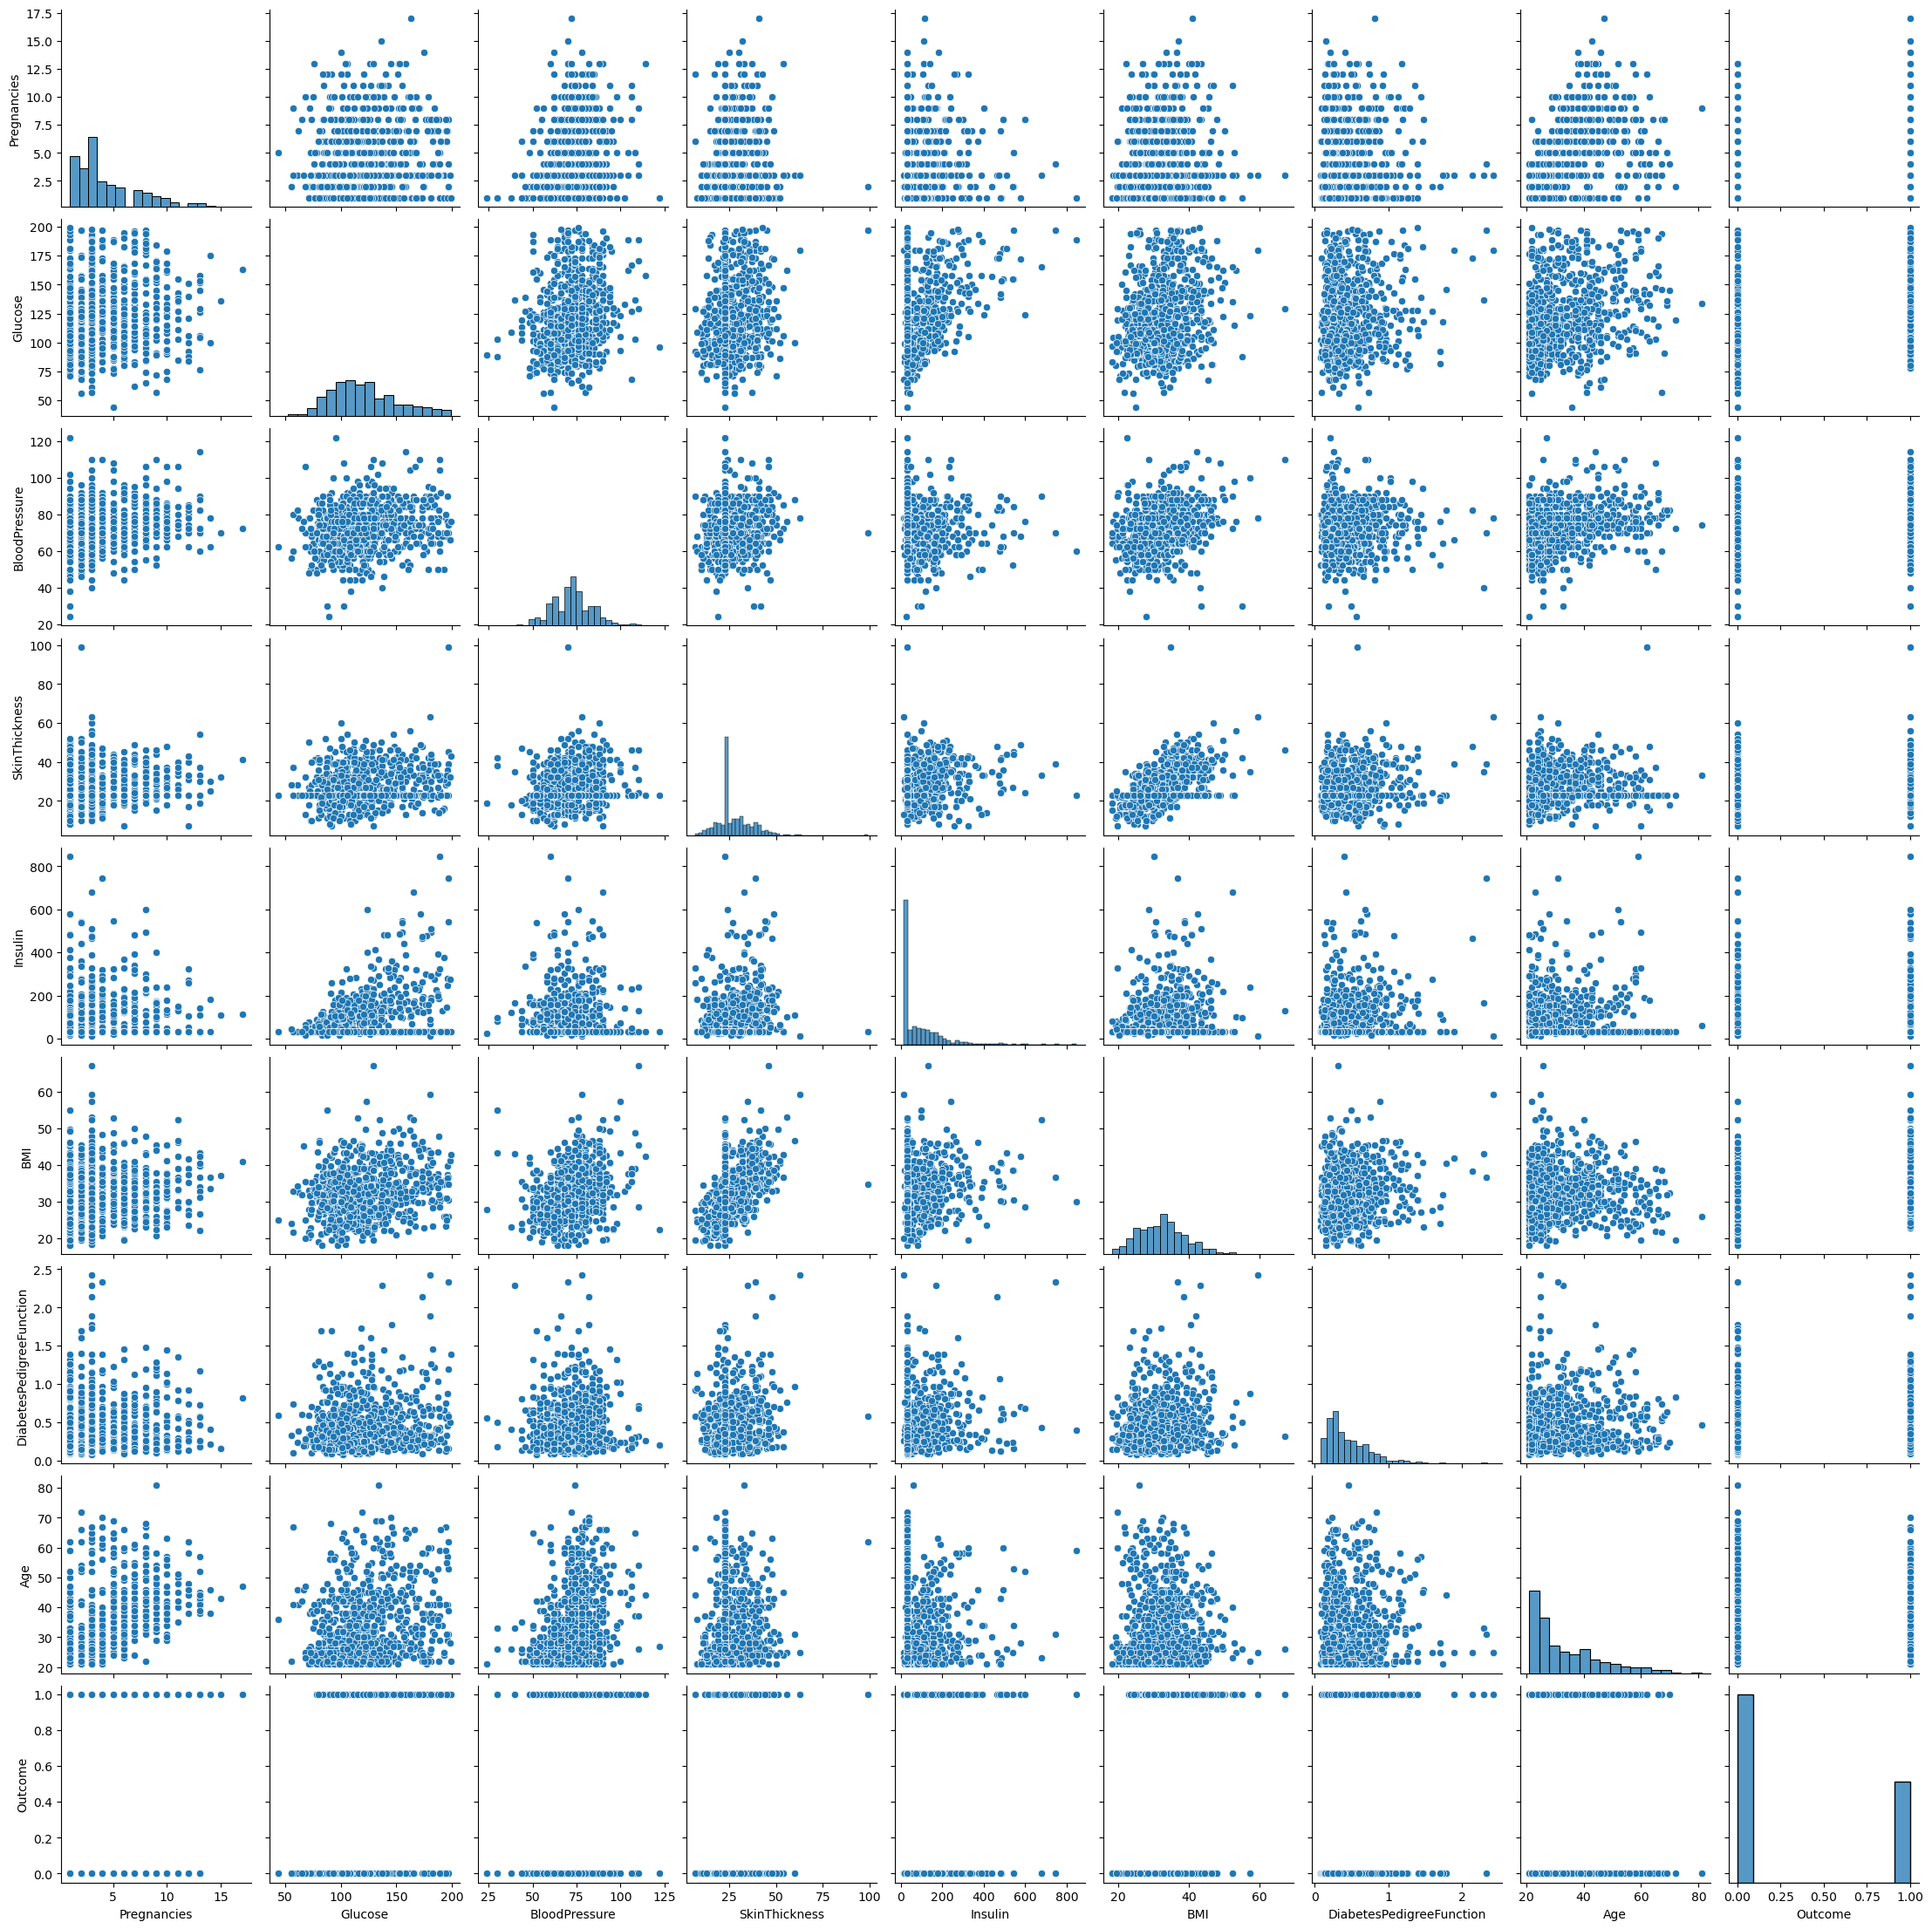

In [42]:
sns.pairplot(df_new)

# Handling Imbalanced Dataset 

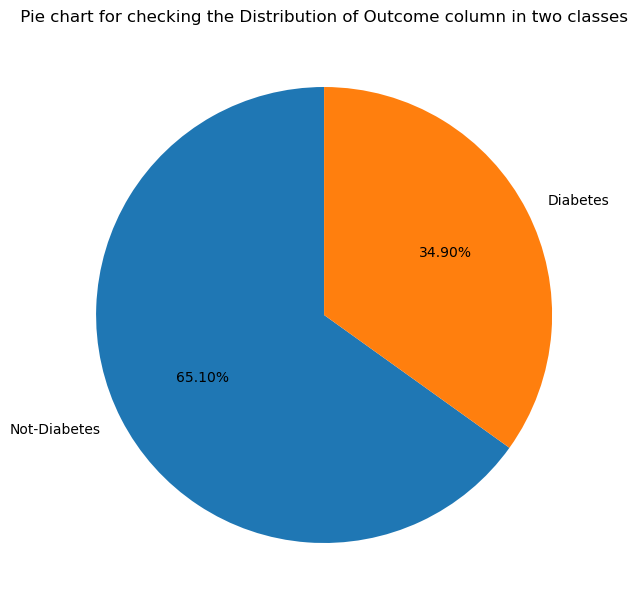

In [44]:
values=df_new['Outcome'].value_counts()

labels=[ 'Not-Diabetes','Diabetes']

plt.figure(figsize=(10,6))

plt.pie( values, labels=labels,  autopct='%1.2f%%', startangle=90)
plt.tight_layout()
plt.title( " Pie chart for checking the Distribution of Outcome column in two classes ")
plt.show()

## OverSampling Using SMOTE

To handle the class imbalance, we can apply oversampling techniques like SMOTE (Synthetic Minority Over-sampling Technique). This method synthetically generates new examples for the minority class (Diabetes) to balance the dataset and improve model generalization.

Let me know if you want the actual Python code for SMOTE!

In [46]:
from imblearn.over_sampling import SMOTE

X_=df.drop(columns=('Outcome'))
y_=df['Outcome']

smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X_, y_)


# Spiltting data into X and y

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)

# Scalling 

In [50]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train_sc=sc.fit_transform(X_train)

X_test_sc=sc.transform(X_test)


In [176]:
X_train_sc.shape

(750, 8)

In [178]:
X_test_sc.shape

(250, 8)

# Check the possible model for Binary Classification 


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

In [54]:

lr_model=LogisticRegression()
rfc_model=RandomForestClassifier()
dt_model=DecisionTreeClassifier()
NB_model=GaussianNB()

models =[lr_model,rfc_model,dt_model,NB_model]




In [56]:
from sklearn.metrics import *

In [58]:


def train_and_eva(model):
    model.fit(X_train_sc, y_train)

    y_pred=model.predict(X_test_sc)
    print(model)
    print("Accuracy :",accuracy_score(y_test,y_pred))
    print("Recall_score :",recall_score(y_pred,y_test))
    print("f1_score :",f1_score(y_pred,y_test))

    conf_mat=confusion_matrix(y_test,y_pred)

    sns.heatmap(conf_mat,annot=True, cmap='coolwarm')
    plt.show()
    

    

LogisticRegression()
Accuracy : 0.76
Recall_score : 0.7619047619047619
f1_score : 0.7619047619047619


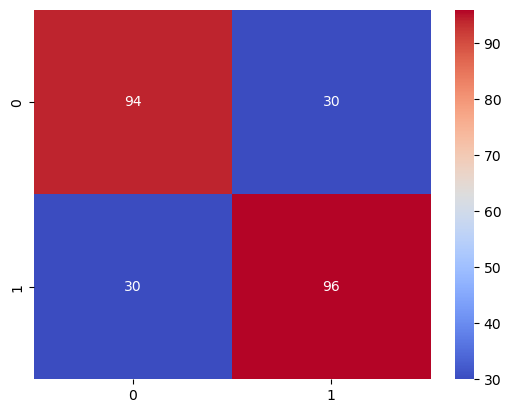

RandomForestClassifier()
Accuracy : 0.792
Recall_score : 0.7642857142857142
f1_score : 0.8045112781954887


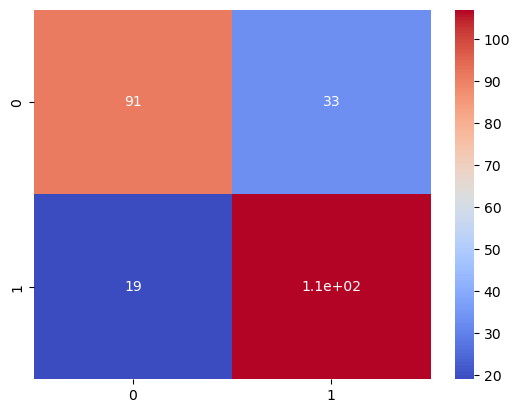

DecisionTreeClassifier()
Accuracy : 0.72
Recall_score : 0.7058823529411765
f1_score : 0.732824427480916


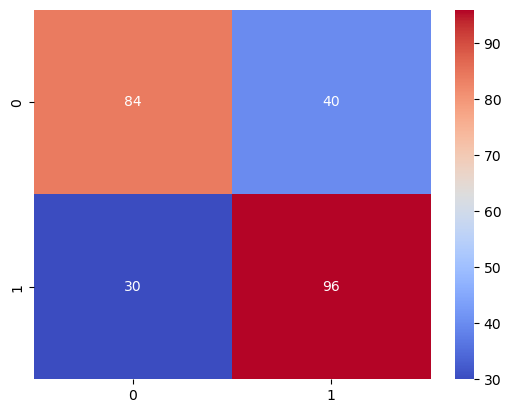

GaussianNB()
Accuracy : 0.78
Recall_score : 0.8034188034188035
f1_score : 0.7736625514403292


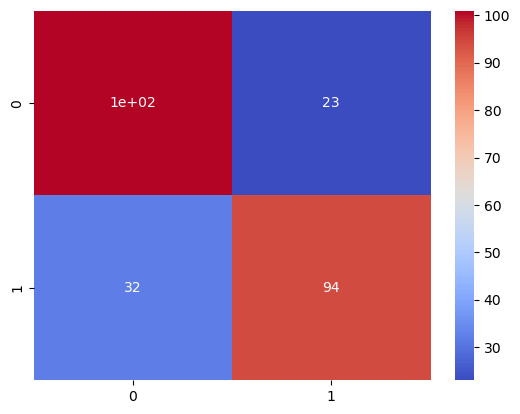

In [60]:

for i in models:
    train_and_eva(i)


In [64]:
print(models)

[LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(), GaussianNB()]


In [68]:
import joblib

# Save the model as a pickle in a file
joblib.dump(rfc_model, 'rfc_model_diabetes.pkl')

['rfc_model_diabetes.pkl']